In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9IUxKOFuU8NoHT8DMUCgsuB6kgDKgy3crnirreHcWZx6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'intelligentairqualitysensingsyste-donotdelete-pr-0wfhuzxoj6apgl'
object_key = 'city_day.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [5]:
data.shape 

(29531, 16)

In [6]:
data = data[data['AQI'].notna()]
data.reset_index(inplace=True,drop=True)

In [7]:
data.shape

(24850, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   PM10        17764 non-null  float64
 4   NO          24463 non-null  float64
 5   NO2         24459 non-null  float64
 6   NOx         22993 non-null  float64
 7   NH3         18314 non-null  float64
 8   CO          24405 non-null  float64
 9   SO2         24245 non-null  float64
 10  O3          24043 non-null  float64
 11  Benzene     21315 non-null  float64
 12  Toluene     19024 non-null  float64
 13  Xylene      9478 non-null   float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.0+ MB


In [9]:
data.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,24850,24850,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000,24850
unique,26,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Delhi,2020-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,1999,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,NaN,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581,NaN
std,NaN,NaN,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585,NaN
min,NaN,NaN,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,NaN,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000,NaN
50%,NaN,NaN,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000,NaN
75%,NaN,NaN,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000,NaN


In [10]:
data.isna().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [11]:
null_cols = data.columns[data.isna().any()].tolist()
null_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene']

In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
data[null_cols] = imputer.fit_transform(data[null_cols])

In [13]:
data.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [14]:
data['Date']= pd.to_datetime(data['Date'],infer_datetime_format=True)
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.drop(['Date'],axis=1,inplace=True)

In [15]:
data.drop(['AQI_Bucket'],axis=1,inplace=True)

<AxesSubplot:xlabel='AQI', ylabel='Count'>

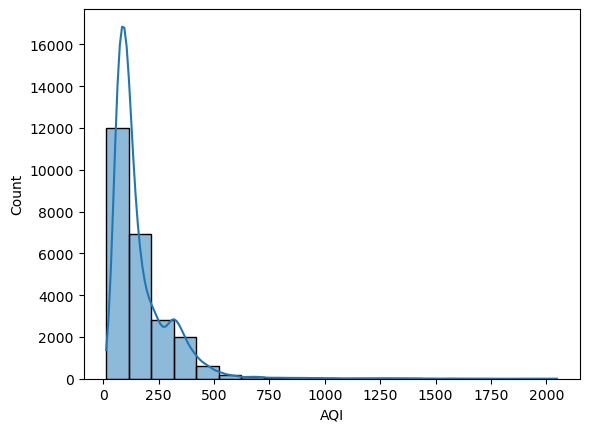

In [16]:
sb.histplot(x=data['AQI'],bins=20, kde=True)

Text(0.5, 1.0, 'AQI')

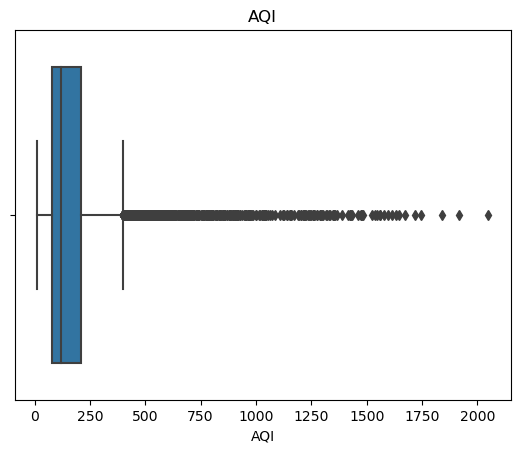

In [17]:
sb.boxplot(x=data["AQI"])
plt.title("AQI")

In [18]:
temp = data[data['AQI']>500]
temp.shape

(543, 16)

In [19]:
data = data[data['AQI']<500]

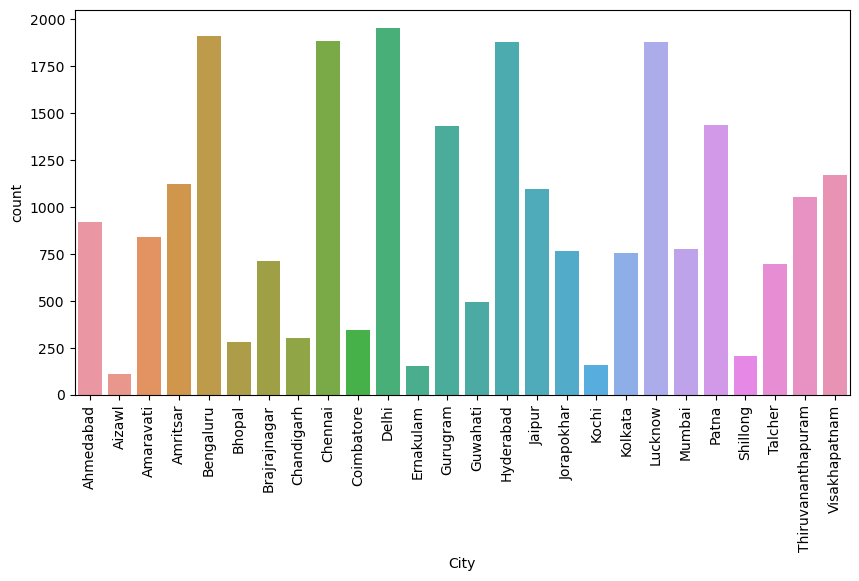

In [20]:
plt.figure(figsize=(10,5))
sb.countplot(x=data['City'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='AQI'>

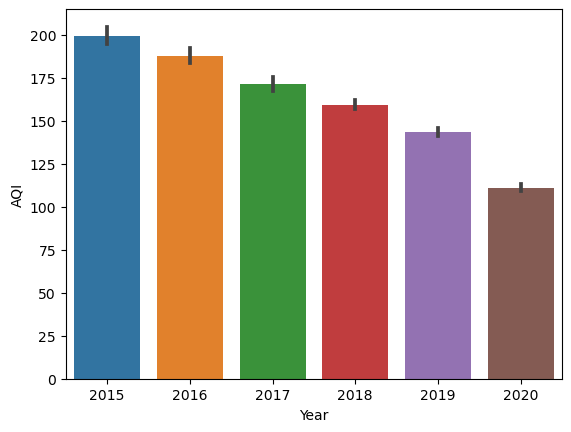

In [21]:
sb.barplot(x=data['Year'],y=data['AQI'])

<AxesSubplot:>

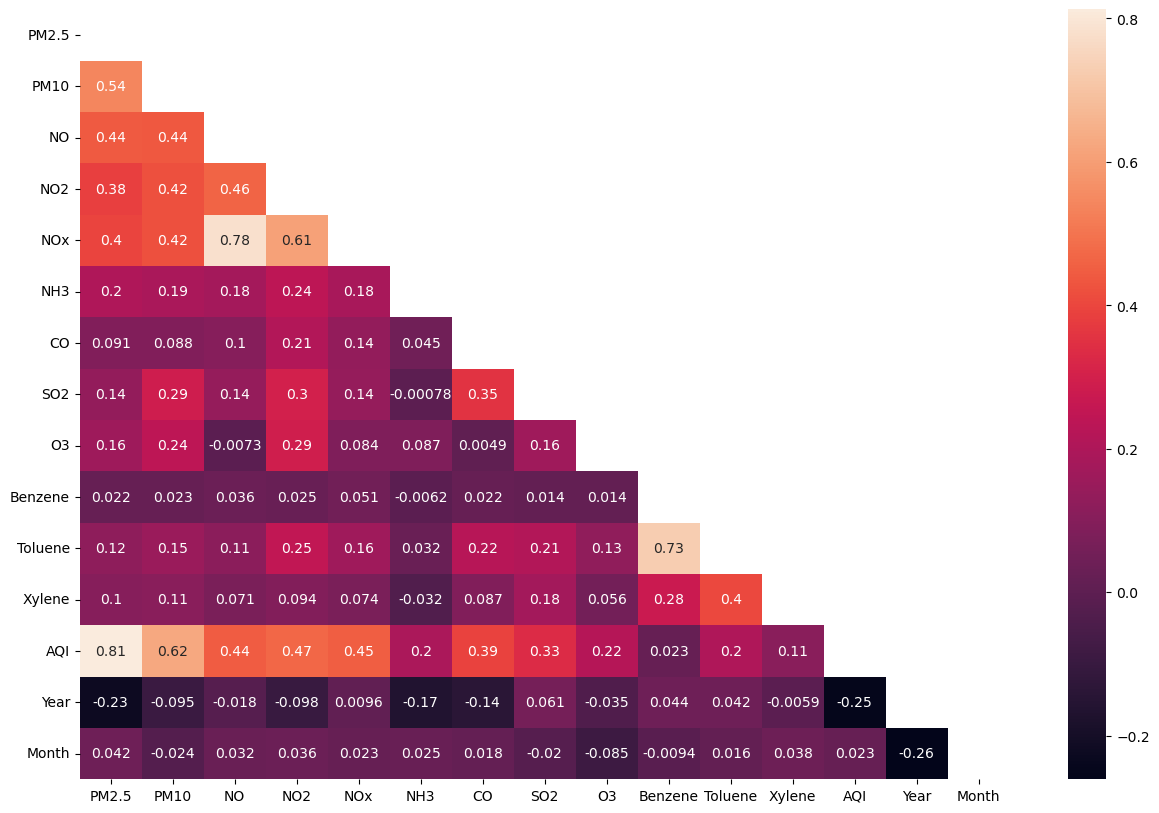

In [22]:
plt.figure(figsize=(15,10))
corr = data.corr()
mask = np.triu(corr)
sb.heatmap(corr,annot=True, mask=mask)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['City'] = le.fit_transform(data['City'])

In [24]:
import joblib
joblib.dump(le,'label_values')

['label_values']

In [25]:
data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
0,0,83.13,64.090,6.93,28.71,33.72,13.890,6.93,49.52,59.76,0.02,0.0,3.14,209.0,2015,1
1,0,79.84,137.080,13.85,28.68,41.08,13.205,13.85,48.49,97.07,0.04,0.0,4.81,328.0,2015,1
6,0,80.65,128.615,2.37,22.83,24.00,15.820,2.37,25.73,47.30,0.00,0.0,0.00,294.0,2015,2
7,0,58.36,96.820,2.60,21.39,23.31,12.275,2.60,32.66,53.54,0.00,0.0,0.00,149.0,2015,2
8,0,79.29,64.090,1.16,26.94,26.83,13.890,1.16,67.41,59.30,0.00,0.0,0.00,190.0,2015,2


In [26]:
data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
0,0,83.13,64.090,6.93,28.71,33.72,13.890,6.93,49.52,59.76,0.02,0.0,3.14,209.0,2015,1
1,0,79.84,137.080,13.85,28.68,41.08,13.205,13.85,48.49,97.07,0.04,0.0,4.81,328.0,2015,1
6,0,80.65,128.615,2.37,22.83,24.00,15.820,2.37,25.73,47.30,0.00,0.0,0.00,294.0,2015,2
7,0,58.36,96.820,2.60,21.39,23.31,12.275,2.60,32.66,53.54,0.00,0.0,0.00,149.0,2015,2
8,0,79.29,64.090,1.16,26.94,26.83,13.890,1.16,67.41,59.30,0.00,0.0,0.00,190.0,2015,2


In [27]:
X = data.drop('AQI', axis = 1)
y = data['AQI']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17013, 15), (7292, 15), (17013,), (7292,))

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3, random_state=42)

In [31]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((11909, 15), (5104, 15), (11909,), (5104,))

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [33]:
#Creating a dictionary of all models
model_dict = {}

model_dict['Decision Tree Regressor'] = DecisionTreeRegressor(random_state=42)
model_dict['Random Forest Regressor'] = RandomForestRegressor(random_state=42)
model_dict['Extra Trees Regressor'] = ExtraTreesRegressor(random_state=42)
model_dict['XGB Regressor'] = XGBRegressor(random_state=42)

In [34]:
#function to print accuracy of all models
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    print('======================================{}======================================='.format(model_name))
    print('R2 Score is : {}'.format(model.score(X_test,y_test)))
    
    print()

In [35]:
print("============VALIDATION DATA============")
print()
for model_name,model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

============VALIDATION DATA============

======================================Decision Tree Regressor=======================================
R2 Score is : 0.8193916906827204

======================================Random Forest Regressor=======================================
R2 Score is : 0.9038457828989463

======================================Extra Trees Regressor=======================================
R2 Score is : 0.9210928902278913

======================================XGB Regressor=======================================
R2 Score is : 0.9122297723997902



In [36]:
print("====================TEST DATA==================")
for model_name,model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

====================TEST DATA==================
======================================Decision Tree Regressor=======================================
R2 Score is : 0.819509315870503

======================================Random Forest Regressor=======================================
R2 Score is : 0.9084296540616538

======================================Extra Trees Regressor=======================================
R2 Score is : 0.9217148730656113

======================================XGB Regressor=======================================
R2 Score is : 0.9140127005715354



In [37]:
et = ExtraTreesRegressor(random_state=42)
et.fit(X_train,y_train)
print("Val R2 Score: {}, Test R2 Score: {}".format(et.score(X_val,y_val),et.score(X_test,y_test)))

Val R2 Score: 0.9210928902278913, Test R2 Score: 0.9217148730656113


Text(0.5, 1.0, 'Prediction Errors')

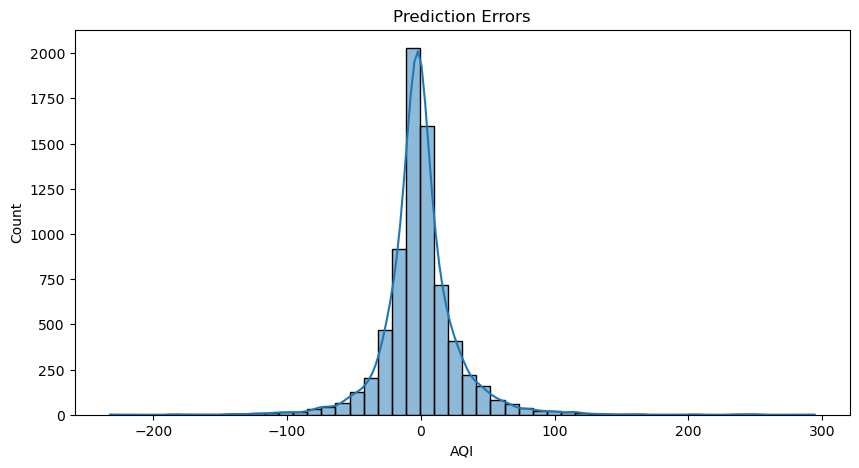

In [38]:
y_pred = et.predict(X_test)
plt.figure(figsize=(10,5))
sb.histplot(y_test-y_pred,bins=50, kde=True)
plt.title("Prediction Errors")

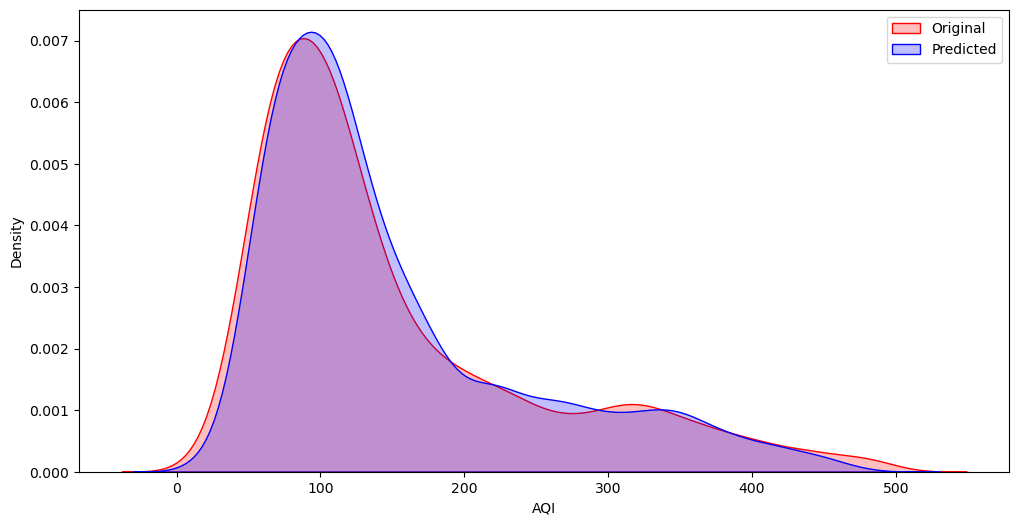

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=y_test,
            color='red', label='Original', fill=True, ax=ax)
sb.kdeplot(data=y_pred,
            color='blue', label='Predicted', fill=True, ax=ax)
plt.legend()

In [40]:
feature_cols = X.columns
feature_cols

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'Year', 'Month'],
      dtype='object')

In [41]:
import pickle
pickle.dump(et,open('model.pkl','wb'))

# IBM Deployment

In [42]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.272
    Uninstalling ibm-watson-machine-learning-1.0.272:
      Successfully uninstalled ibm-watson-machine-learning-1.0.272


In [43]:
from ibm_watson_machine_learning import APIClient

In [44]:
wml_credentials={
    "apikey":"8Q9n8K8Wq9Asg1QjULQwdj8K8liF4hy2aQD1cOi1lyDc",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [45]:
wml_client=APIClient(wml_credentials)

In [46]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------  ------------------------
ID                                    NAME               CREATED
73f1e45c-94c5-43fa-ac8c-48bfe5521be9  AQAnalysis_Deploy  2023-01-29T19:38:57.110Z
------------------------------------  -----------------  ------------------------


In [47]:
space_id = '73f1e45c-94c5-43fa-ac8c-48bfe5521be9'
wml_client.set.default_space(space_id)

'SUCCESS'

In [48]:
model_name = 'AQAnalysis'
deployment_name = 'AQAnalysis_Deploy'
demo_model = et

In [49]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [50]:
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [51]:
model_props={
    wml_client.repository.ModelMetaNames.NAME:model_name,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [52]:
model_details=wml_client.repository.store_model(
    model=demo_model,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [53]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'AQI',
  'schemas': {'input': [{'fields': [{'name': 'City', 'type': 'int64'},
      {'name': 'PM2.5', 'type': 'float64'},
      {'name': 'PM10', 'type': 'float64'},
      {'name': 'NO', 'type': 'float64'},
      {'name': 'NO2', 'type': 'float64'},
      {'name': 'NOx', 'type': 'float64'},
      {'name': 'NH3', 'type': 'float64'},
      {'name': 'CO', 'type': 'float64'},
      {'name': 'SO2', 'type': 'float64'},
      {'name': 'O3', 'type': 'float64'},
      {'name': 'Benzene', 'type': 'float64'},
      {'name': 'Toluene', 'type': 'float64'},
      {'name': 'Xylene', 'type': 'float64'},
      {'name': 'Year', 'type': 'int64'},
      {'name': 'Month', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name'

In [54]:
model_id=wml_client.repository.get_model_id(model_details)
model_id

'2ab8261f-a5e6-4225-99d1-4d0bb28fb4a0'

In [57]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:deployment_name,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

# IBM Model Deployment

In [58]:
deployment=wml_client.deployments.create(artifact_uid=model_id,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: '2ab8261f-a5e6-4225-99d1-4d0bb28fb4a0' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d07195bf-74e8-40da-89e7-cfb9d1872d3a'
------------------------------------------------------------------------------------------------




# Test The IBM Deployed Model

In [5]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "8Q9n8K8Wq9Asg1QjULQwdj8K8liF4hy2aQD1cOi1lyDc"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": ["City","PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene","Year","Month"],"values": [[18,3,2,2,1,2,1,5,4,2,3,2,1,2022,6]]}]}
response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/d07195bf-74e8-40da-89e7-cfb9d1872d3a/predictions?version=2023-01-30', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())
pred=response_scoring.json()
output=pred['predictions'][0]['values'][0][0]
print("AQI is: ",output)

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[133.0]]}]}
AQI is:  133.0
